# EDA

## Loding all tools needed for the Explotary Data Analysis

In [81]:
from pathlib import Path
from PIL import Image
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rn

## Dataset path

In [82]:
# "C:/Users/Lenovo/OneDrive/Desktop/DS_MVP/raw_data"
# "//wsl$/Ubuntu/home/reemalzahrani/code/REEMZX/DS_MVP/raw_data"
DATASET_ROOT = Path("/home/reemalzahrani/code/REEMZX/DS_MVP/raw_data")
test_dir, train_dir, val_dir = [DATASET_ROOT / x for x in ["test", "train", "val"]]

test_dir, train_dir, val_dir


(PosixPath('/home/reemalzahrani/code/REEMZX/DS_MVP/raw_data/test'),
 PosixPath('/home/reemalzahrani/code/REEMZX/DS_MVP/raw_data/train'),
 PosixPath('/home/reemalzahrani/code/REEMZX/DS_MVP/raw_data/val'))

In [83]:
classes = ["ejecta", "none", "oldcrater"]
classes

['ejecta', 'none', 'oldcrater']

In [84]:
# total imges for each class

def count_images(folder):
    return sum(1 for f in folder.glob("*") if f.suffix.lower() in [".jpg", ".png", ".jpeg"])

def count_by_class(root):
    return {cls: count_images(root / cls) for cls in classes}

train_counts = count_by_class(train_dir)
val_counts   = count_by_class(val_dir)
test_counts  = count_by_class(test_dir)

train_counts, val_counts, test_counts

({'ejecta': 358, 'none': 2656, 'oldcrater': 594},
 {'ejecta': 55, 'none': 440, 'oldcrater': 118},
 {'ejecta': 89, 'none': 533, 'oldcrater': 157})

## Random sample visualization of the data

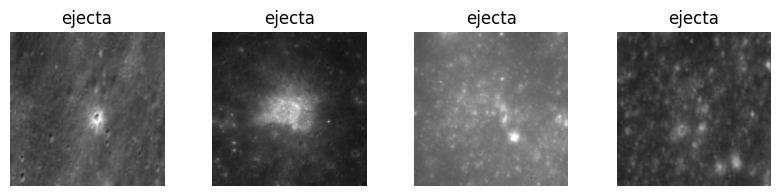

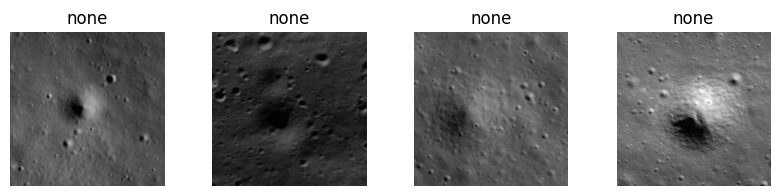

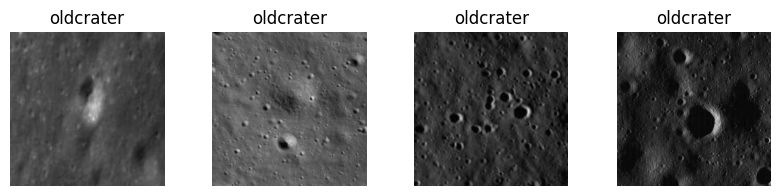

In [85]:
def show_samples(class_name, n=5, subset="train"):

    folder = {"train": train_dir, "val": val_dir, "test": test_dir}[subset] / class_name

    files = [f for f in folder.glob("*") if f.suffix.lower() in [".jpg", ".jpeg", ".png"]]
    chosen = rn.sample(files, n)

    plt.figure(figsize=(10, 2))
    for i, img_path in enumerate(chosen):
        plt.subplot(1, n, i+1)
        img = Image.open(img_path)
        plt.imshow(img, cmap="gray")
        plt.title(class_name)
        plt.axis("off")
    plt.show()


for cls in classes:
    show_samples(cls, n=4, subset="train")


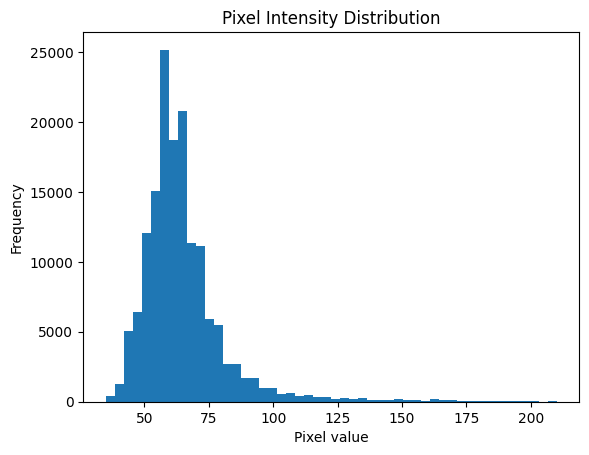

In [133]:
# pick random image
valid_img = [f for f in (train_dir / "ejecta").glob("*") if f.suffix.lower() in [".jpg", ".jpeg", ".png"]]
# img_path = rn.choice(list((train_dir / "ejecta").glob("*")))
img_path = rn.choice(valid_img)
img = Image.open(img_path)
arr = np.array(img)

plt.hist(arr.flatten(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()
